In [1]:
import pandas as pd
import gzip
import json
import os
import jq
from collections import defaultdict
import re

from pathlib import Path

In [2]:
p = Path('../2-9.playwright/output/')
oses = ['mac', 'win', 'linux']
imr = Path('imr')
for os in oses:
    (imr / f'raf-{os}').mkdir(parents=True, exist_ok=True)
DATE='0527'

In [3]:
# def extract_hlsl(s):
#     pattern = r"// INITIAL HLSL BEGIN\n*(.*?)\n*// INITIAL HLSL END"
#     match = re.search(pattern, s, re.DOTALL)

#     if match:
#         return match.group(1)
#     else:
#         return None
# extract_hlsl("aaa// INITIAL HLSL BEGIN\nbbb\n// INITIAL HLSL ENDccc")

In [4]:
# results = defaultdict(dict)
# for os in oses:
#     for path in (imr / f'raf-{os}').glob('*.json'):
#         try:
#             tmp = json.loads(path.read_text())
#             sources = jq.compile('.. | objects | select(.source?) | .source').input(text=json.dumps(tmp)).all()
#             translatedSources = jq.compile('.. | objects | select(.translatedSource?) | .translatedSource').input(text=json.dumps(tmp)).all()
#             if os == 'win':
#                 translatedSources = [extract_hlsl(s) for s in translatedSources]
#             results[path.stem][os] = {
#                 'sources': sources,
#                 'translatedSources': translatedSources
#             }
#         except Exception as e:
#             print(path)
#             pass

In [5]:
# sources = jq.compile('.frame.gl_rafs[].value.data.contextInfo[].maghsk | {shaders, programs}').input(text=path.read_text()).all()
# shaders_list = []
# global_program_id = 0
# for context_id, context in enumerate(sources):
#     tmp = {}
#     for shader in context['shaders']:
#         tmp[shader['id']] = {
#             'idx_url': path.stem,
#             'idx_context': context_id,
#             'idx_program': None,
#             'source': shader['source'],
#             'translatedSource': shader['translatedSource'] if os != 'win' else extract_hlsl(shader['translatedSource']),
#             'type': 'vertex' if shader['type'] == 35633 else 'fragment',
#         }
#     for program in context['programs']:
#         for x in program['shaders']:
#             tmp[x]['idx_program'] = global_program_id
#         global_program_id += 1
#     shaders_list.extend(tmp.values())

In [6]:
df = pd.read_pickle(f'imr/{DATE}-translated_shader_preproc.pkl.zst', compression='zstd').dropna(subset=['source']).explode('source').reset_index(drop=False).rename(columns={'index': 'idx_shader'})

In [7]:
df

,idx_shader,idx_url,idx_context,idx_program,os,source,translatedSource,type
0,0,00000,0,0,win,#version 300 es\nprecision mediump sampler2DAr...,#pragma warning( disable: 3556 3571 )\nfloat3 ...,vertex
1,1,00000,0,0,win,#version 300 es\n#define varying in\nlayout(lo...,#pragma warning( disable: 3556 3571 )\nstruct ...,fragment
2,2,01830,0,0,win,precision highp float;\nprecision highp int;\n...,#pragma warning( disable: 3556 3571 )\nfloat3 ...,vertex
3,3,01830,0,0,win,precision highp float;\nprecision highp int;\n...,#pragma warning( disable: 3556 3571 )\nstruct ...,fragment
4,4,02745,0,0,win,precision highp float;\nprecision highp int;\n...,#pragma warning( disable: 3556 3571 )\nfloat4 ...,vertex
...,...,...,...,...,...,...,...,...
474277,475240,29235,0,5,linux,\n #ifdef GL_ES\n precision highp float;\n ...,#version 450\nin vec2 _ua_pos;\nuniform mat4 _...,vertex
474278,475241,29235,0,6,linux,#define HAS_UNIFORM_u_opacity\n#define HAS_UNI...,#version 450\nout vec4 webgl_FragColor;\nunifo...,fragment
474279,475242,29235,0,6,linux,#define HAS_UNIFORM_u_opacity\n#define HAS_UNI...,#version 450\n// BEGIN: Generated code for bui...,vertex
474280,475243,29235,0,7,linux,#define HAS_UNIFORM_u_fill_color\n#define HAS_...,#version 450\nout vec4 webgl_FragColor;\nunifo...,fragment


In [8]:
df[df.source.map(lambda x: type(x) != str)]

,idx_shader,idx_url,idx_context,idx_program,os,source,translatedSource,type


In [9]:
df.source.astype('str').str.len().min()

13

In [10]:
df

,idx_shader,idx_url,idx_context,idx_program,os,source,translatedSource,type
0,0,00000,0,0,win,#version 300 es\nprecision mediump sampler2DAr...,#pragma warning( disable: 3556 3571 )\nfloat3 ...,vertex
1,1,00000,0,0,win,#version 300 es\n#define varying in\nlayout(lo...,#pragma warning( disable: 3556 3571 )\nstruct ...,fragment
2,2,01830,0,0,win,precision highp float;\nprecision highp int;\n...,#pragma warning( disable: 3556 3571 )\nfloat3 ...,vertex
3,3,01830,0,0,win,precision highp float;\nprecision highp int;\n...,#pragma warning( disable: 3556 3571 )\nstruct ...,fragment
4,4,02745,0,0,win,precision highp float;\nprecision highp int;\n...,#pragma warning( disable: 3556 3571 )\nfloat4 ...,vertex
...,...,...,...,...,...,...,...,...
474277,475240,29235,0,5,linux,\n #ifdef GL_ES\n precision highp float;\n ...,#version 450\nin vec2 _ua_pos;\nuniform mat4 _...,vertex
474278,475241,29235,0,6,linux,#define HAS_UNIFORM_u_opacity\n#define HAS_UNI...,#version 450\nout vec4 webgl_FragColor;\nunifo...,fragment
474279,475242,29235,0,6,linux,#define HAS_UNIFORM_u_opacity\n#define HAS_UNI...,#version 450\n// BEGIN: Generated code for bui...,vertex
474280,475243,29235,0,7,linux,#define HAS_UNIFORM_u_fill_color\n#define HAS_...,#version 450\nout vec4 webgl_FragColor;\nunifo...,fragment


In [11]:
vertex_sources_unique = sorted(df[df['type']=='vertex'].source.unique(), key=lambda x: len(x))
fragment_sources_unique = sorted(df[df['type']=='fragment'].source.unique(), key=lambda x: len(x))

In [12]:
vertex_sources_unique

['void main(){}',
 'void main() {}',
 'attribute vec4 A; void main() { gl_Position = A; }',
 'attribute vec4 p; void main() { gl_Position = p; }',
 'void main() { gl_Position = vec4( 1.0, 1.0, 1.0, 1.0); }',
 'attribute vec3 pos;void main() {gl_Position = vec4(pos, 1.0);}',
 'attribute vec3 position;void main(){gl_Position=vec4(position,1.0);}',
 'attribute vec4 a_position;\n\nvoid main() {\n  gl_Position = a_position;\n}',
 'attribute vec4 a_position;\n\nvoid main() {\n  gl_Position = a_position;\n}\n',
 'attribute vec2 position; void main () {gl_Position = vec4(position,0,1);}',
 'attribute vec2 a_pos;\nvoid main() {\ngl_Position = vec4(a_pos, 0.0, 1.0);\n}',
 'attribute vec2 a_pos;\nvoid main() {\n  gl_Position = vec4(a_pos, 0.0, 1.0);\n}',
 'attribute vec3 aPosition;\nvoid main() {\ngl_Position = vec4(aPosition, 1.0);\n}',
 'attribute vec3 position; void main() { gl_Position = vec4( position, 1.0 ); }',
 'attribute vec3 position;\n\nvoid main()\n{ \n\tgl_Position = vec4(position, 1

In [13]:
fragment_sources_unique

['precision highp float;\nvoid main(){}',
 'void main(){gl_FragColor=vec4(1,0,0,1);}',
 'void main() {gl_FragColor = vec4(1,0,0,1);}',
 '#version 100\nvoid main(){gl_FragColor=vec4(0,0,0,1);}',
 'varying lowp vec4 id;void main(void){gl_FragColor=id;}',
 'void main() {gl_FragColor = vec4(0.0, 0.0, 0.0, 1.0);}',
 'void main() {\ngl_FragColor = vec4(1.0, 1.0, 1.0, 1.0);\n}',
 'void main() {\n  gl_FragColor = vec4(1.0, 1.0, 1.0, 1.0);\n}',
 'precision highp float;void main(){gl_FragColor=vec4(0.5);}',
 '\nvoid main() {\n    gl_FragColor = vec4(1.0, 1.0, 1.0, 0.1);\n}',
 'varying lowp vec4 vColor; void main() { gl_FragColor = vColor; }',
 '#version 100\nvoid main() {\n    gl_FragColor = vec4(1, 0, 0, 1);\n}',
 'precision highp float;\nvoid main () {\ngl_FragColor = vec4(1.0);\n}',
 'uniform highp vec4 uColor; void main() { gl_FragColor = uColor; }',
 'uniform lowp vec4 u_color;\nvoid main() {\ngl_FragColor = u_color;\n}',
 '\n    void main() {\n        gl_FragColor = vec4(1, 1, 1, 1);\n    

In [14]:
df_win = df[df.os == 'win']
df_linux = df[df.os == 'linux']
df_mac = df[df.os == 'mac']
df_gl = df.drop_duplicates(subset=['source', 'idx_url', 'idx_context', 'type'])

In [15]:
# plot three histograms in one plot
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2)

# length

df_win_transloc 345.0
df_linux_transloc 196.0
df_mac_transloc 162.0
df_gl_transloc 879.0


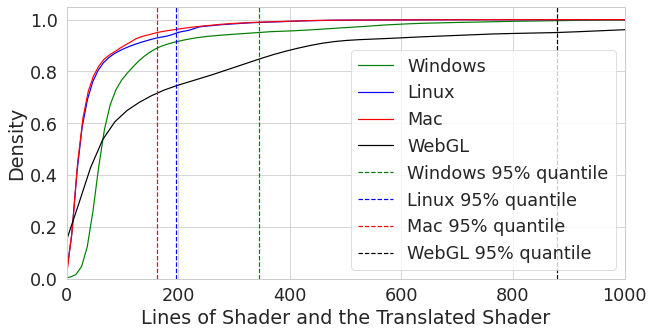

In [16]:
df_win_transloc = df_win.translatedSource.astype('str').str.count('\n')
df_linux_transloc = df_linux.translatedSource.astype('str').str.count('\n')
df_mac_transloc = df_mac.translatedSource.astype('str').str.count('\n')
df_gl_transloc = df_gl.source.astype('str').str.count('\n')

fig, ax = plt.subplots(figsize=(10, 5))
# 绘制三个系列的直方图
sns.kdeplot(df_win_transloc, ax=ax, color='green', label='Windows', cumulative=True, alpha=1.)
sns.kdeplot(df_linux_transloc, ax=ax, color='blue', label='Linux', cumulative=True, alpha=1.)
sns.kdeplot(df_mac_transloc, ax=ax, color='red', label='Mac', cumulative=True, alpha=1.)
sns.kdeplot(df_gl_transloc, ax=ax, color='black', label='WebGL', cumulative=True, alpha=1.)
# 设置图例
ax.set_xlim(0, 1000)
ax.set_xlabel('Lines of Shader and the Translated Shader')
# show 0.95 quantile
print('df_win_transloc', df_win_transloc.quantile(0.95))
print('df_linux_transloc', df_linux_transloc.quantile(0.95))
print('df_mac_transloc', df_mac_transloc.quantile(0.95))
print('df_gl_transloc', df_gl_transloc.quantile(0.95))
ax.axvline(df_win_transloc.quantile(0.95), color='green', linestyle='--', label='Windows 95% quantile', alpha=1.)
ax.axvline(df_linux_transloc.quantile(0.95), color='blue', linestyle='--', label='Linux 95% quantile', alpha=1.)
ax.axvline(df_mac_transloc.quantile(0.95), color='red', linestyle='--', label='Mac 95% quantile', alpha=1.)
ax.axvline(df_gl_transloc.quantile(0.95), color='black', linestyle='--', label='WebGL 95% quantile', alpha=1.)
# custom_legend_item = mlines.Line2D([], [], color='black', linestyle='--', label='Density Line')

# 添加自定义图例项到图例
# ax.legend(handles=[custom_legend_item])
# set legend position
ax.legend(loc='lower right')
# ax.legend()
# 显示图形
plt.savefig('fig/results_shader_translated_shader_loc.pdf', bbox_inches='tight')

df_win_translen 10979.0
df_linux_translen 7588.299999999988
df_mac_translen 7433.0
df_gl_translen 29734.999999999767


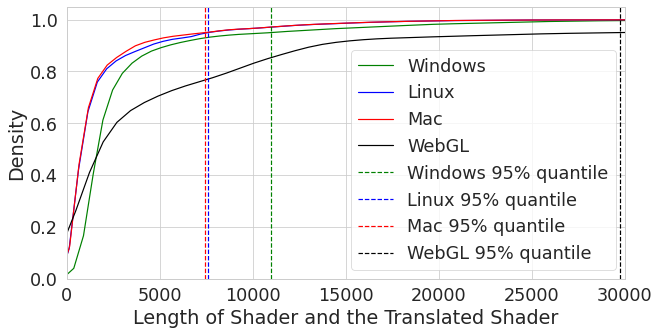

In [17]:
df_win_translen = df_win.translatedSource.astype('str').str.len()
df_linux_translen = df_linux.translatedSource.astype('str').str.len()
df_mac_translen = df_mac.translatedSource.astype('str').str.len()
df_gl_translen = df_gl.source.astype('str').str.len()

fig, ax = plt.subplots(figsize=(10, 5))
# 绘制三个系列的直方图
sns.kdeplot(df_win_translen, ax=ax, color='green', label='Windows', cumulative=True, alpha=1.)
sns.kdeplot(df_linux_translen, ax=ax, color='blue', label='Linux', cumulative=True, alpha=1.)
sns.kdeplot(df_mac_translen, ax=ax, color='red', label='Mac', cumulative=True, alpha=1.)
sns.kdeplot(df_gl_translen, ax=ax, color='black', label='WebGL', cumulative=True, alpha=1.)
# 设置图例
ax.set_xlim(0, 30000)
ax.set_xlabel('Length of Shader and the Translated Shader')
# show 0.95 quantile
print('df_win_translen', df_win_translen.quantile(0.95))
print('df_linux_translen', df_linux_translen.quantile(0.95))
print('df_mac_translen', df_mac_translen.quantile(0.95))
print('df_gl_translen', df_gl_translen.quantile(0.95))
ax.axvline(df_win_translen.quantile(0.95), color='green', linestyle='--', label='Windows 95% quantile', alpha=1.)
ax.axvline(df_linux_translen.quantile(0.95), color='blue', linestyle='--', label='Linux 95% quantile', alpha=1.)
ax.axvline(df_mac_translen.quantile(0.95), color='red', linestyle='--', label='Mac 95% quantile', alpha=1.)
ax.axvline(df_gl_translen.quantile(0.95), color='black', linestyle='--', label='WebGL 95% quantile', alpha=1.)
# custom_legend_item = mlines.Line2D([], [], color='black', linestyle='--', label='Density Line')

# 添加自定义图例项到图例
# ax.legend(handles=[custom_legend_item])
# set legend position
ax.legend(loc='lower right')
# ax.legend()
# 显示图形
plt.savefig('fig/results_shader_translated_shader_len.pdf', bbox_inches='tight')

# Compute Shaders

In [18]:
eee = df[df['source'] == vertex_sources_unique[20]]['translatedSource'].iloc[2]
df[df['translatedSource'] == eee]

,idx_shader,idx_url,idx_context,idx_program,os,source,translatedSource,type
319206,319848,06413,0,0,linux,#define GLSLIFY 1\nattribute vec2 a_position;\...,#version 450\nin vec2 _ua_position;\nvoid main...,vertex
321548,322190,03989,0,0,linux,attribute vec2 a_position;\n\nvoid main() {\n ...,#version 450\nin vec2 _ua_position;\nvoid main...,vertex
332833,333524,03483,0,0,linux,// <![CDATA[\n\tattribute vec2 a_position;\n\t...,#version 450\nin vec2 _ua_position;\nvoid main...,vertex
391545,392278,13884,1,3,linux,\n attribute vec2 a_position;\n ...,#version 450\nin vec2 _ua_position;\nvoid main...,vertex
391547,392280,13884,1,4,linux,\n attribute vec2 a_position;\n ...,#version 450\nin vec2 _ua_position;\nvoid main...,vertex
391549,392282,13884,1,5,linux,\n attribute vec2 a_position;\n ...,#version 450\nin vec2 _ua_position;\nvoid main...,vertex
391551,392284,13884,1,6,linux,\n attribute vec2 a_position;\n ...,#version 450\nin vec2 _ua_position;\nvoid main...,vertex
391553,392286,13884,1,7,linux,\n attribute vec2 a_position;\n ...,#version 450\nin vec2 _ua_position;\nvoid main...,vertex
391555,392288,13884,1,8,linux,\n attribute vec2 a_position;\n ...,#version 450\nin vec2 _ua_position;\nvoid main...,vertex
391557,392290,13884,1,9,linux,\n attribute vec2 a_position;\n ...,#version 450\nin vec2 _ua_position;\nvoid main...,vertex


In [19]:
df_linux_nunique = df_linux.groupby('translatedSource').nunique().add_prefix('nunique_').reset_index(drop=False)
df_linux_nunique['length'] = df_linux_nunique.translatedSource.astype('str').str.len()
df_linux_nunique.sort_values('length', ascending=True, inplace=True)

<Axes: xlabel='length', ylabel='Density'>

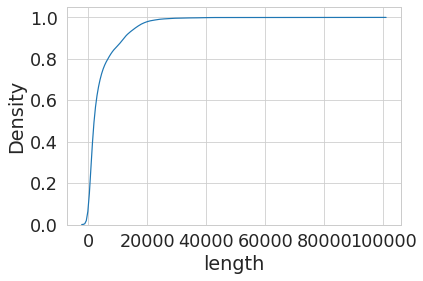

In [20]:
sns.kdeplot(df_linux_nunique.length, cumulative=True)

In [21]:
print(df_linux_nunique.sort_values('length', ascending=True).loc[11478,'translatedSource'])

#version 450
out vec4 webgl_FragColor;
in vec3 _uv_data;
in float _uv_visibility;
in vec4 _ucolor;
uniform float _uu_radius;
uniform float _uu_blur;
uniform float _uu_opacity;
in vec4 _ustroke_color;
uniform float _uu_stroke_width;
uniform float _uu_stroke_opacity;
void main(){
  (webgl_FragColor = vec4(0.0, 0.0, 0.0, 0.0));
  float _uradius = _uu_radius;
  float _ublur = _uu_blur;
  float _uopacity = _uu_opacity;
  float _ustroke_width = _uu_stroke_width;
  float _ustroke_opacity = _uu_stroke_opacity;
  vec2 _uextrude = _uv_data.xy;
  float _uextrude_length = length(_uextrude);
  float _uantialiasblur = _uv_data.z;
  float _uantialiased_blur = (-max(_ublur, _uantialiasblur));
  float _uopacity_t = smoothstep(0.0, _uantialiased_blur, (_uextrude_length - 1.0));
  float _ucolor_t = (((_ustroke_width < 0.0099999998)) ? (0.0) : (smoothstep(_uantialiased_blur, 0.0, (_uextrude_length - (_uradius / (_uradius + _ustroke_width))))));
  vec4 _uout_color = mix((_ucolor * _uopacity), (_ustroke_col

<Axes: >

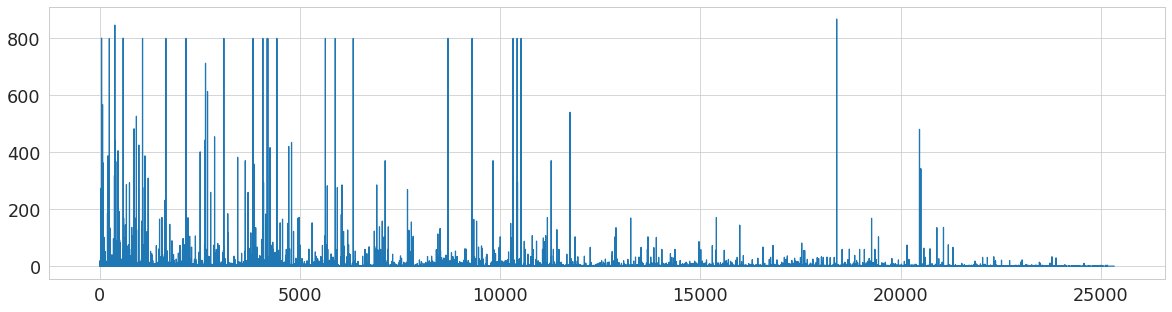

In [22]:
fig, ax = plt.subplots(figsize=(20, 5))
df_linux_nunique['nunique_idx_url'].reset_index(drop=True).plot()

In [23]:
df_linux_nunique.iloc[:120].translatedSource.tolist()

['',
 '#version 450\nvoid main(){\n}\n\x00',
 '#version 450\nvoid main(){\n  discard;\n}\n\x00',
 '#version 450\nuniform vec4 _uucolor_S0;\nvoid main(){\n}\n\x00',
 '#version 450\nvoid main(){\n  (gl_Position = vec4(0.0, 0.0, 0.0, 0.0));\n}\n\x00',
 '#version 450\nin vec2 _uvUV;\nvoid main(){\n  if ((_uvUV.x > -100.0))\n  {\n    discard;\n  }\n}\n\x00',
 '#version 450\nin vec4 _up;\nvoid main(){\n  (gl_Position = vec4(0.0, 0.0, 0.0, 0.0));\n  (gl_Position = _up);\n}\n\x00',
 '#version 450\nin vec4 _uA;\nvoid main(){\n  (gl_Position = vec4(0.0, 0.0, 0.0, 0.0));\n  (gl_Position = _uA);\n}\n\x00',
 '#version 450\nuniform vec3 _un70;\nout vec3 _uv36;\nvoid main(){\n  (_uv36 = vec3(0.0, 0.0, 0.0));\n  (_uv36 = _un70);\n}\n\x00',
 '#version 450\nvoid main(){\n  (gl_Position = vec4(0.0, 0.0, 0.0, 0.0));\n  (gl_Position = vec4(1.0, 1.0, 1.0, 1.0));\n}\n\x00',
 '#version 450\nin vec3 _uoa;\nvoid main(){\n  if ((((_uoa.x * _uoa.x) * _uoa.x) > (_uoa.y * _uoa.z)))\n  {\n    discard;\n  }\n}\n\x00'

In [24]:
df_linux

,idx_shader,idx_url,idx_context,idx_program,os,source,translatedSource,type
318404,319046,02745,0,0,linux,precision highp float;\nprecision highp int;\n...,#version 450\nuniform mat4 _umodelMatrix;\nuni...,vertex
318405,319047,02745,0,0,linux,precision highp float;\nprecision highp int;\n...,#version 450\nout vec4 webgl_FragColor;\nunifo...,fragment
318406,319048,02745,0,1,linux,precision highp float;\nprecision highp int;\n...,#version 450\nuniform mat4 _umodelMatrix;\nuni...,vertex
318407,319049,02745,0,1,linux,precision highp float;\nprecision highp int;\n...,#version 450\nout vec4 webgl_FragColor;\nunifo...,fragment
318408,319050,02745,0,2,linux,precision highp float;\nprecision highp int;\n...,#version 450\nuniform mat4 _umodelMatrix;\nuni...,vertex
...,...,...,...,...,...,...,...,...
474277,475240,29235,0,5,linux,\n #ifdef GL_ES\n precision highp float;\n ...,#version 450\nin vec2 _ua_pos;\nuniform mat4 _...,vertex
474278,475241,29235,0,6,linux,#define HAS_UNIFORM_u_opacity\n#define HAS_UNI...,#version 450\nout vec4 webgl_FragColor;\nunifo...,fragment
474279,475242,29235,0,6,linux,#define HAS_UNIFORM_u_opacity\n#define HAS_UNI...,#version 450\n// BEGIN: Generated code for bui...,vertex
474280,475243,29235,0,7,linux,#define HAS_UNIFORM_u_fill_color\n#define HAS_...,#version 450\nout vec4 webgl_FragColor;\nunifo...,fragment


In [25]:
# # save all df_linux_nunique.translatedSource
# op = (imr / 'df_linux_nunique.translatedSource')
# op.mkdir(exist_ok=True, parents=True)
# (op / 'vertex').mkdir(exist_ok=True, parents=True)
# (op / 'fragment').mkdir(exist_ok=True, parents=True)

# tmp = df_linux.copy().drop_duplicates(subset=['translatedSource'])
# tmp['length'] = tmp.translatedSource.astype('str').str.len()

# for idx, row in tmp.sort_values(by='length', ascending=True).reset_index().iterrows():
#     type = row['type']
#     source = row['translatedSource']
#     with open(op / type / f'{idx:07d}.{type[:4]}', 'w') as f:
#         f.write(source[:-1])

In [26]:
df_gl

,idx_shader,idx_url,idx_context,idx_program,os,source,translatedSource,type
0,0,00000,0,0,win,#version 300 es\nprecision mediump sampler2DAr...,#pragma warning( disable: 3556 3571 )\nfloat3 ...,vertex
1,1,00000,0,0,win,#version 300 es\n#define varying in\nlayout(lo...,#pragma warning( disable: 3556 3571 )\nstruct ...,fragment
2,2,01830,0,0,win,precision highp float;\nprecision highp int;\n...,#pragma warning( disable: 3556 3571 )\nfloat3 ...,vertex
3,3,01830,0,0,win,precision highp float;\nprecision highp int;\n...,#pragma warning( disable: 3556 3571 )\nstruct ...,fragment
4,4,02745,0,0,win,precision highp float;\nprecision highp int;\n...,#pragma warning( disable: 3556 3571 )\nfloat4 ...,vertex
...,...,...,...,...,...,...,...,...
474081,475044,29204,2,NaN,linux,precision mediump float;\nvoid main(void){\nfl...,#version 450\nout vec4 webgl_FragColor;\nvoid ...,fragment
474082,475045,29204,3,NaN,linux,precision mediump float;\nvoid main(void){\nfl...,#version 450\nout vec4 webgl_FragColor;\nvoid ...,fragment
474084,475047,29204,3,5.0,linux,precision mediump float;\n#define SHADER_NAME ...,#version 450\nout vec4 webgl_FragColor;\nin ve...,fragment
474202,475165,29219,1,NaN,linux,precision mediump float;\nvoid main(void){\nfl...,#version 450\nout vec4 webgl_FragColor;\nvoid ...,fragment


In [27]:
# # save all df_gl.source
# op = (imr / 'df_gl_unique.source')
# op.mkdir(exist_ok=True, parents=True)
# (op / 'vertex').mkdir(exist_ok=True, parents=True)
# (op / 'fragment').mkdir(exist_ok=True, parents=True)

# tmp = df_gl.copy().drop_duplicates(subset=['source'])
# tmp['length'] = tmp.translatedSource.astype('str').str.len()

# for idx, row in tmp.sort_values(by='length', ascending=True).reset_index().iterrows():
#     type = row['type']
#     source = row['source']
#     with open(op / type / f'{idx:07d}.{type[:4]}', 'w') as f:
#         f.write(source[:-1])

# 重复率

<Axes: >

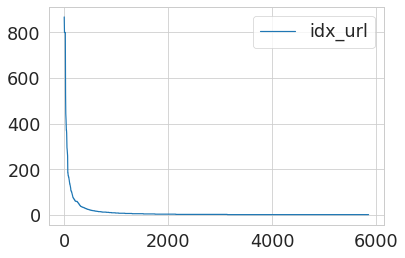

In [28]:
# 跨网站之间重复率
src_to_url_nunique = df_linux.groupby('translatedSource')['idx_url'].nunique().sort_values(ascending=False)
src_to_url_nunique[src_to_url_nunique>1].reset_index().plot()

In [29]:
ratio = src_to_url_nunique.shape[0] / src_to_url_nunique.sum()
ratio

0.24628439787318837

In [30]:
# 同一个网站内部重复率
tmp = df_linux.groupby(['idx_url', 'translatedSource']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False)

In [31]:
tmp[tmp['count'] > 1]['count']

101306    1400
5699       424
5716       424
44697      253
24422      184
          ... 
102309       2
7281         2
8509         2
96948        2
102648       2
Name: count, Length: 19451, dtype: int64

<Axes: >

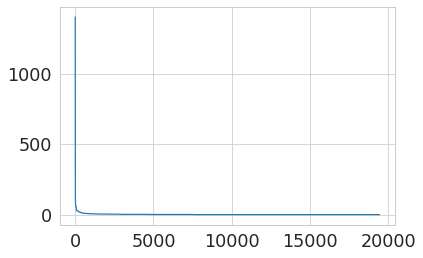

In [32]:
tmp[tmp['count'] > 1]['count'].reset_index(drop=True).plot()

In [41]:
s = 'layout\(std140\) uniform'
print(df_linux[df_linux['translatedSource'].str.contains(s)].iloc[0].source)

#version 300 es
#define WEBGL2 
#define DIFFUSEDIRECTUV 0
#define AMBIENTDIRECTUV 0
#define OPACITYDIRECTUV 0
#define EMISSIVEDIRECTUV 0
#define SPECULARDIRECTUV 0
#define BUMPDIRECTUV 0
#define NORMAL
#define NUM_BONE_INFLUENCERS 0
#define BonesPerMesh 0
#define LIGHTMAPDIRECTUV 0
#define NUM_MORPH_INFLUENCERS 0
#define VIGNETTEBLENDMODEMULTIPLY
#define SAMPLER3DGREENDEPTH
#define SAMPLER3DBGRMAP
#define LIGHT0
#define HEMILIGHT0
#define LIGHT1
#define HEMILIGHT1

#define SHADER_NAME vertex:default
precision highp float;
layout(std140,column_major) uniform;
uniform Material
{
vec4 diffuseLeftColor;
vec4 diffuseRightColor;
vec4 opacityParts;
vec4 reflectionLeftColor;
vec4 reflectionRightColor;
vec4 refractionLeftColor;
vec4 refractionRightColor;
vec4 emissiveLeftColor;
vec4 emissiveRightColor;
vec2 vDiffuseInfos;
vec2 vAmbientInfos;
vec2 vOpacityInfos;
vec2 vReflectionInfos;
vec3 vReflectionPosition;
vec3 vReflectionSize;
vec2 vEmissiveInfos;
vec2 vLightmapInfos;
vec2 vSpecularInfos;
v

In [34]:
df_linux['translatedSource']

318404    #version 450\nuniform mat4 _umodelMatrix;\nuni...
318405    #version 450\nout vec4 webgl_FragColor;\nunifo...
318406    #version 450\nuniform mat4 _umodelMatrix;\nuni...
318407    #version 450\nout vec4 webgl_FragColor;\nunifo...
318408    #version 450\nuniform mat4 _umodelMatrix;\nuni...
                                ...                        
474277    #version 450\nin vec2 _ua_pos;\nuniform mat4 _...
474278    #version 450\nout vec4 webgl_FragColor;\nunifo...
474279    #version 450\n// BEGIN: Generated code for bui...
474280    #version 450\nout vec4 webgl_FragColor;\nunifo...
474281    #version 450\n// BEGIN: Generated code for bui...
Name: translatedSource, Length: 155878, dtype: object